# Main Function

Need to do the following in terminal to run:
mkdir tmp
mkdir tmp/ppo
mkdir plots


In [1]:
import gym
import numpy as np
from ipynb.fs.full.CartPolePPO import Agent
from utils import plot_learning_curve

/Users/stanleyaraki/Desktop/Data_Analysis_Portfolio/Proximal-Policy-Optimization/CartPolePPO.ipynb:207: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/pytorch/torch/csrc/utils/tensor_new.cpp:210.)
  "\n",


... saving models ...
episode 0 score 13.0 avg score 13.0 time_steps 13 learning_steps 0
... saving models ...
episode 1 score 16.0 avg score 14.5 time_steps 29 learning_steps 1
episode 2 score 11.0 avg score 13.3 time_steps 40 learning_steps 2
episode 3 score 13.0 avg score 13.2 time_steps 53 learning_steps 2
episode 4 score 15.0 avg score 13.6 time_steps 68 learning_steps 3
episode 5 score 8.0 avg score 12.7 time_steps 76 learning_steps 3
episode 6 score 12.0 avg score 12.6 time_steps 88 learning_steps 4
episode 7 score 11.0 avg score 12.4 time_steps 99 learning_steps 4
episode 8 score 12.0 avg score 12.3 time_steps 111 learning_steps 5
episode 9 score 9.0 avg score 12.0 time_steps 120 learning_steps 6
episode 10 score 10.0 avg score 11.8 time_steps 130 learning_steps 6
episode 11 score 8.0 avg score 11.5 time_steps 138 learning_steps 6
episode 12 score 8.0 avg score 11.2 time_steps 146 learning_steps 7
episode 13 score 10.0 avg score 11.1 time_steps 156 learning_steps 7
episode 14 s

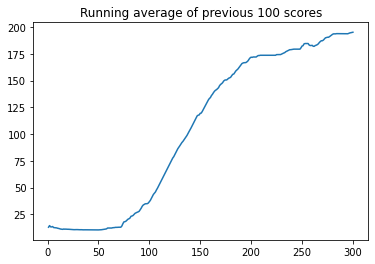

In [2]:
# if __name__ == '__main__':
#     env = gym.make('CartPole-v0') # does work on more advanced environments but requires more fine-tuning
#     N = 20
#     batch_size = 5
#     num_epochs = 4
#     alpha = 0.0003
#     agent = Agent(num_actions=env.action_space.n, batch_size=batch_size, alpha=alpha, num_epochs=num_epochs, input_dims=env.observation_space.shape)
#     num_games = 300

#     figure_file = 'plots/cartpole.png'

#     best_score = env.reward_range[0]
#     score_history = []
    
#     learn_iters = 0
#     avg_score = 0
#     num_steps = 0 # number of steps we take

#     for i in range(num_games):
#         observation = env.reset()
#         done = False
#         score = 0
#         while not done:
#             action, prob, val = agent.choose_action(observation)
#             observation_, reward, done, info = env.step(action)
#             score += reward
#             agent.remember(observation, action, prob, val, reward, done)
#             if num_steps % N == 0: # if true, it's time to perform learning function
#                 agent.learn()
#                 learn_iters += 1
#             observation = observation_
#         score_history.append(score)
#         avg_score = np.mean(score_history[-100:])

#         if avg_score > best_score: # if best score found
#             best_score = avg_score
#             agent.save_models()
        
#         print('episode', i, 'score %.1f' % score, 'avg score %.1f' % avg_score, 'time_steps', num_steps, 'learning_steps', learn_iters)

#     x = [i + 1 for i in range(len(score_history))]
#     plot_learning_curve(x, score_history, figure_file)

if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    N = 20
    batch_size = 5
    n_epochs = 4
    alpha = 0.0003
    agent = Agent(num_actions=env.action_space.n, batch_size=batch_size, 
                    alpha=alpha, num_epochs=n_epochs, 
                    input_dims=env.observation_space.shape)
    n_games = 300

    figure_file = 'plots/cartpole.png'

    best_score = env.reward_range[0]
    score_history = []

    learn_iters = 0
    avg_score = 0
    n_steps = 0

    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action, prob, val = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            n_steps += 1
            score += reward
            agent.remember(observation, action, prob, val, reward, done)
            if n_steps % N == 0:
                agent.learn()
                learn_iters += 1
            observation = observation_
        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        if avg_score > best_score:
            best_score = avg_score
            agent.save_models()

        print('episode', i, 'score %.1f' % score, 'avg score %.1f' % avg_score,
                'time_steps', n_steps, 'learning_steps', learn_iters)
    x = [i+1 for i in range(len(score_history))]
    plot_learning_curve(x, score_history, figure_file)

